# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import os

base_path = '/content/drive/MyDrive/UT Austin DA Course/'
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith('.csv'):
            print(os.path.join(root, file))

In [14]:
# read the data
data = pd.read_csv('/content/drive/MyDrive/UT Austin DA/Project 2 Food Hub/foodhub_order.csv')
# returns the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# CORRECT
# 0 and 1 are the index to get rows and cols
rows = data.shape[0]
cols = data.shape[1]
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 1898
Number of columns: 9


#### Observations:
Number of rows: 1898
Number of columns: 9

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
#CORRECT
# Use info() to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [140]:
# Group by 'customer_id' and then filter for duplicated customer IDs
duplicated_customers = data[data.duplicated(subset=['customer_id'], keep=False)]

# Sort the result by 'customer_id' in descending order
duplicated_customers_sorted = duplicated_customers.sort_values('customer_id', ascending=False)

# Display the sorted DataFrame of duplicated customers
print(duplicated_customers_sorted)
duplicated_customers_sorted.shape

num_duplicated_customers = duplicated_customers_sorted['customer_id'].nunique()
print(f"Number of unique customers with duplicate orders: {num_duplicated_customers}")

      order_id  customer_id             restaurant_name cuisine_type  \
793    1478220       399729           Blue Ribbon Sushi     Japanese   
1744   1477732       399729                 Shake Shack     American   
640    1477799       399520        Xe May Sandwich Shop   Vietnamese   
373    1477014       399520        Xe May Sandwich Shop   Vietnamese   
1222   1478312       398952                 Han Dynasty      Chinese   
...        ...          ...                         ...          ...   
1040   1476949        14869            Pepe Rosso To Go      Italian   
889    1477787        14869                 Shake Shack     American   
1178   1477489        14869                 Tres Carnes      Mexican   
943    1477662         6987  Hill Country Fried Chicken     Southern   
1199   1477113         6987  Hill Country Fried Chicken     Southern   

      cost_of_the_order day_of_the_week  rating  food_preparation_time  \
793                8.83         Weekend     4.0              

#### Observations:
There are 416 customers who have returned to FoodHub from this dataset to order again. I am uncertain as to how long the gap is before these customrs return.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# CORRECT
data.isnull().sum() # I don't believe there are any missing values?

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [12]:
# for checking null values in cols
data.loc[data['rating'].isnull()==True]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


#### Observations:
There are no null values, except rating has 736 NaN values


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [15]:
# CORRECT
# Getting the statistical summary
print(data['food_preparation_time'].describe())
# OR LIKE THIS
min_t = min(data['food_preparation_time'])
avg_t = round(sum(data['food_preparation_time'])/len(data['food_preparation_time']),2)
max_t = max(data['food_preparation_time'])
print(f"The minimum time for food to be prepared: {min_t}")
print(f"The average time for food to be prepared: {avg_t}")
print(f"The maximum time for food to be prepared: {max_t}")

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64
The minimum time for food to be prepared: 20
The average time for food to be prepared: 27.37
The maximum time for food to be prepared: 35


#### Observations:
The minimum time for food to be prepared: 20,
The average time for food to be prepared: 27.37,
The maximum time for food to be prepared: 35

### **Question 5:** How many orders are not rated? [1 mark]

In [16]:
# Correct
# needs Coerce to filter the NaN values
data['rating'] = pd.to_numeric(data['rating'], errors='coerce') # Convert to numeric, replace non-numeric with NaN
NaN_values = data['rating'].isna().sum()
Total_values = data['rating'].sum()
print(f"Number of NaN values: {NaN_values}")
print(f"Total values: {Total_values}")
Perc_of_nan = round(NaN_values/Total_values*100,2)
print(f"Percent of NaN values: {Perc_of_nan}")

Number of NaN values: 736
Total values: 5048.0
Percent of NaN values: 14.58


#### Observations:

*  736 of the orders made have no rating, but also 1 and 2 values are missing
*  Almost 15% of the ratings are not accounted for. I could assume the 15% of the data is the mean, or I could assume they are low ratings to see the worst case scenario for Food Hub.






### Exploratory Data Analysis (EDA)



### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [79]:
# Create a function to plot the univariate analysis
def univariate_analysis(data, column, dtype='numeric', top_n=None):
    plt.figure(figsize=(12, 6))
    if dtype == 'numeric':
      #histogram
      sns.histplot(data = data, x =column)
      sns.boxplot(data = data, x =column)
      plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
    elif dtype == 'categorical':
    #histogram
      sns.countplot(data = data, x =column)
      plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping

      # Get value counts
      value_counts = data[column].value_counts()

      # Limit to top N if specified
      if top_n is not None:
          value_counts = value_counts.nlargest(top_n)

* Any plot in the univariate deviating from this function is because the plot misrepresents the data.

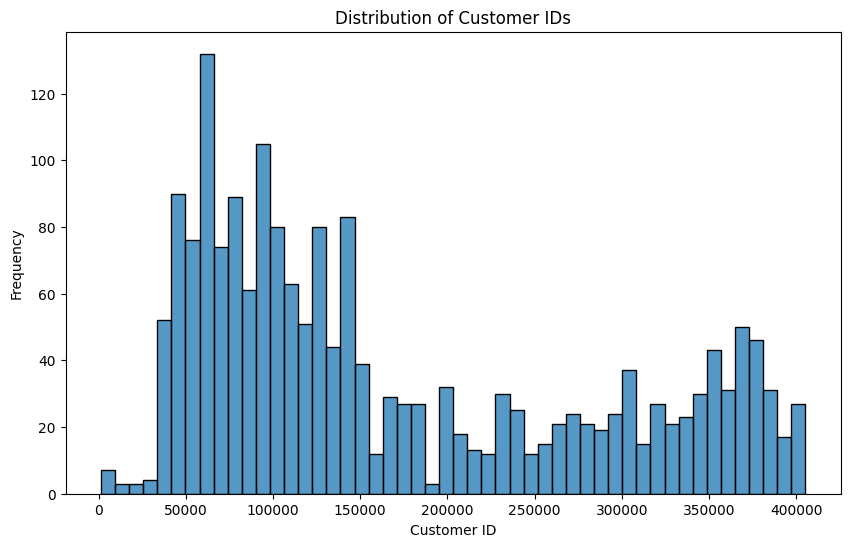

In [153]:
# Explore 'customer_id' - Countplot is not meaningful for IDs
plt.figure(figsize=(10, 6))
sns.histplot(data['customer_id'], bins=50, kde=False)

# labels and title
plt.title('Distribution of Customer IDs')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.show()

Observations:
*  Although we see a trend of customer_id's 150000 and below, the customer_id analysis does not yeild any value as we cannot compare it with any other data.

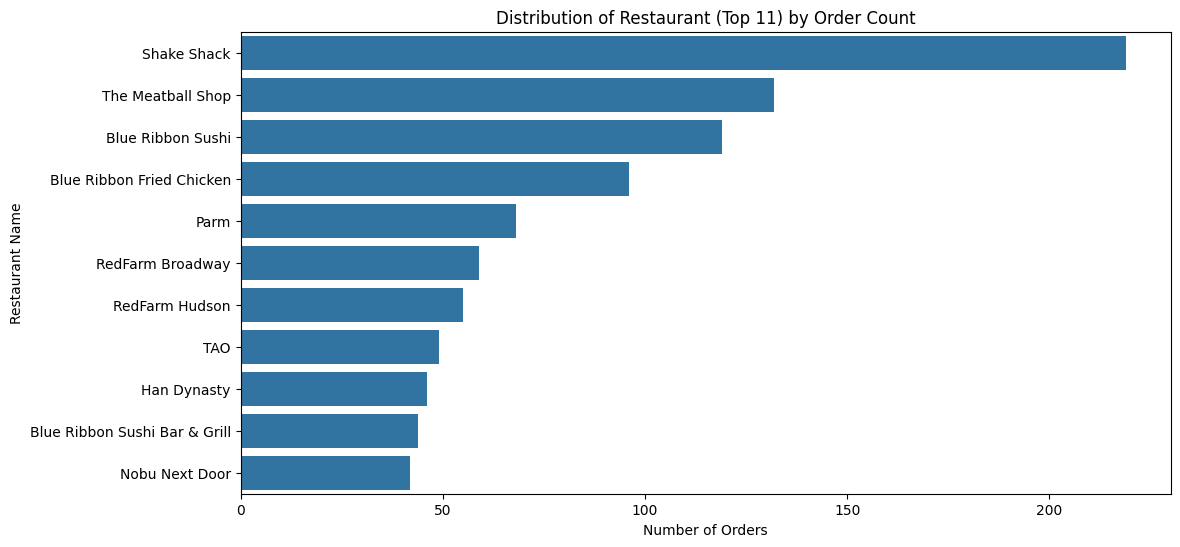

In [141]:
# Calculate the order counts for each restaurant
order_counts = data['restaurant_name'].value_counts()

# Calculate the cumulative distribution
cumulative_distribution = order_counts.cumsum() / order_counts.sum()

# Determine the threshold for the top 50% of orders
threshold = cumulative_distribution[cumulative_distribution <= 0.50].index

# Filter the data to include only the top 50% of restaurants
filtered_data = data[data['restaurant_name'].isin(threshold)]

# Plot the filtered data
plt.figure(figsize=(12, 6))
sns.countplot(y=filtered_data['restaurant_name'], order=filtered_data['restaurant_name'].value_counts().index)
plt.title('Distribution of Restaurant (Top 11) by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.show()

Observations:
* The distrobution follows a normal curve - with the full dataset, the plot is very right skewed.
* Even within the top 5, Shake Shack by far has the most orders.
**** It should be noted that I chose to graph the top restaurants by 50% of restaurant orders because there were too many restaurants to plot.
* The top 50% of orders are shared by 11 restaurants.

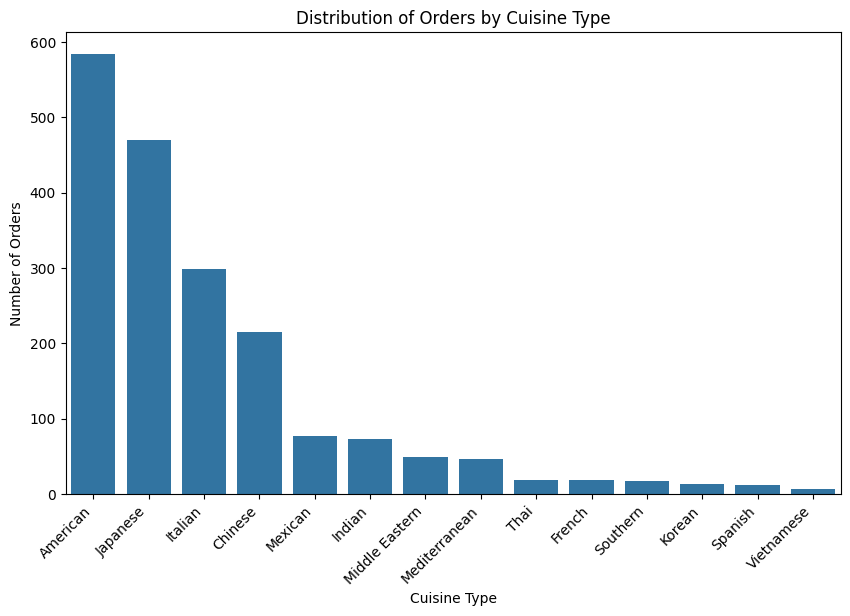

In [154]:
# Explore 'cuisine_type'
plt.figure(figsize=(10, 6))
sns.countplot(x=data['cuisine_type'], order=data['cuisine_type'].value_counts().index)

# labels and title
plt.title('Distribution of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

Observations:
*  Certain cuisine types like American, Italian, and Japanese are more frequently ordered.

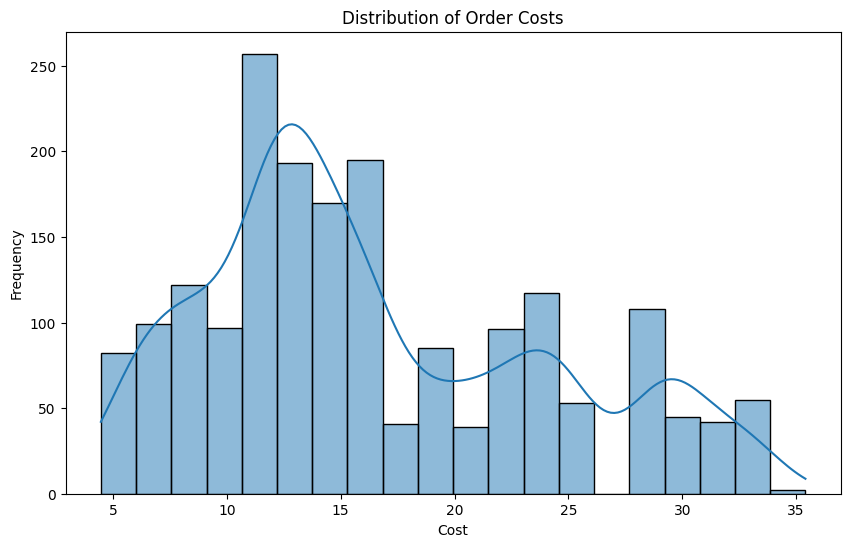

In [155]:
# Explore 'cost'
plt.figure(figsize=(10, 6))
sns.histplot(data['cost_of_the_order'], bins=20, kde=True)

# labels and title
plt.title('Distribution of Order Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

Observations:
*  The cost of orders appears to be right-skewed, with most orders falling within a lower price range.
* Returning customers and/or frequency of orders significantly diminishes after the price reaches about $16. This also shows that customers are more likely to have an order above 9 dollars as they are below 16.

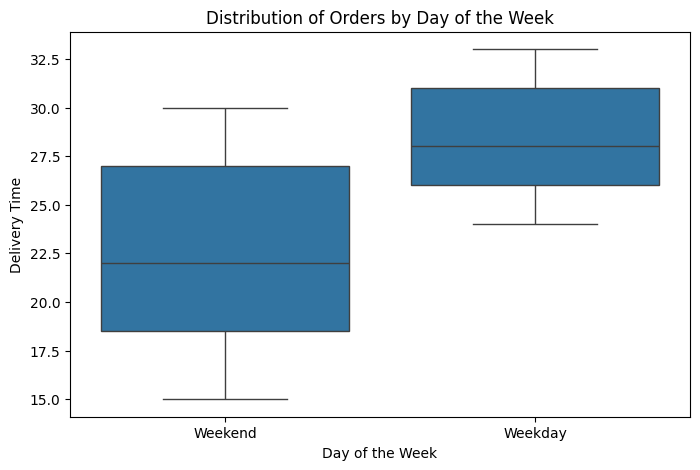

In [142]:
# Explore 'day_of_the_week'
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="day_of_the_week", y="delivery_time")

# labels and title
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()

Observations:
* The mean delivery time on weekdays is around 28 minutes, differing from the mean delivery time on weekends being around 22 minutes
* The quickest delivery time on the weekends is around 15 minutes, where as the quickest delivery time on weekdays is around 24 minutes.
* The overall range on weekdays for delivery time is 24-33 minutes, the overall range on weekends for delivery time is 15-30 minutes
* Why is delivery time 2-10 minutes faster on weekends compared to weekdays? It might be beneficial to analyze Work related traffic, to see if that could be a leading factor.

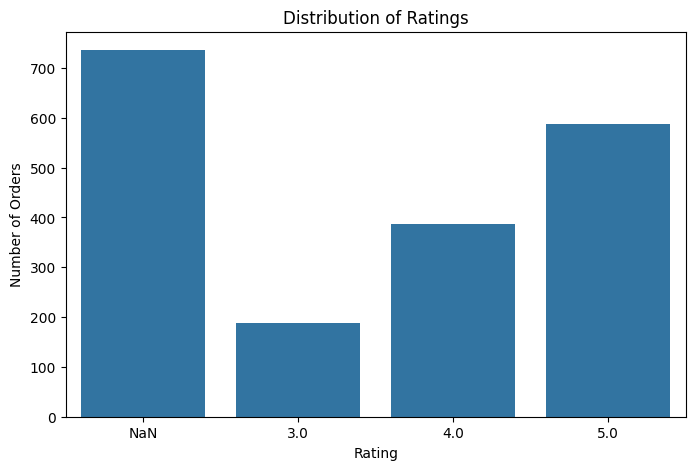

In [95]:
# Explore 'rating'
plt.figure(figsize=(8, 5))
sns.countplot(x=data['rating'].fillna('NaN'), order=['NaN', 3.0, 4.0, 5.0])

# labels and title
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.show()

Observations:
*  There seems to be far more ratings for 4.0 and 5.0 than any other given.
*  Resolving these NaN values would be beneficial for future data collection and analysis.

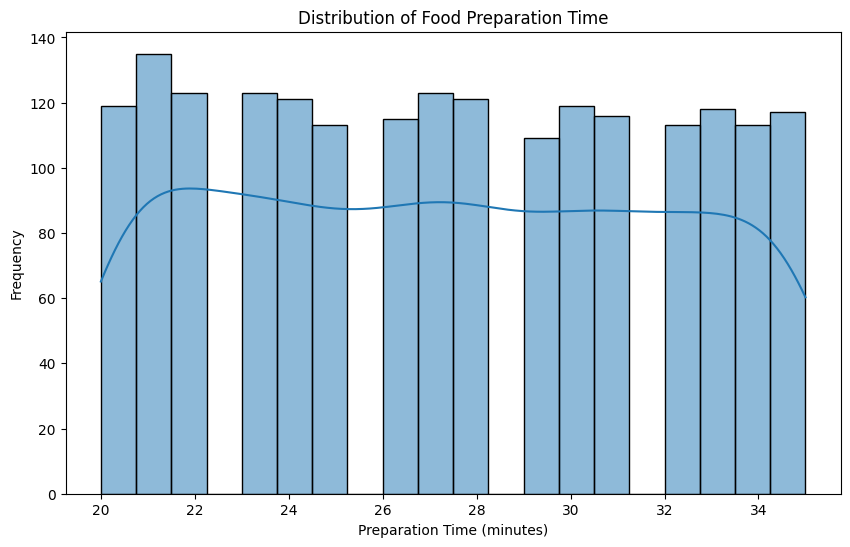

In [85]:
# Explore 'food_preparation_time'
plt.figure(figsize=(10, 6))
sns.histplot(data['food_preparation_time'], bins=20, kde=True)

# labels and title
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()

Observations:
*  There is no obvious trend between frequency and food prep time.

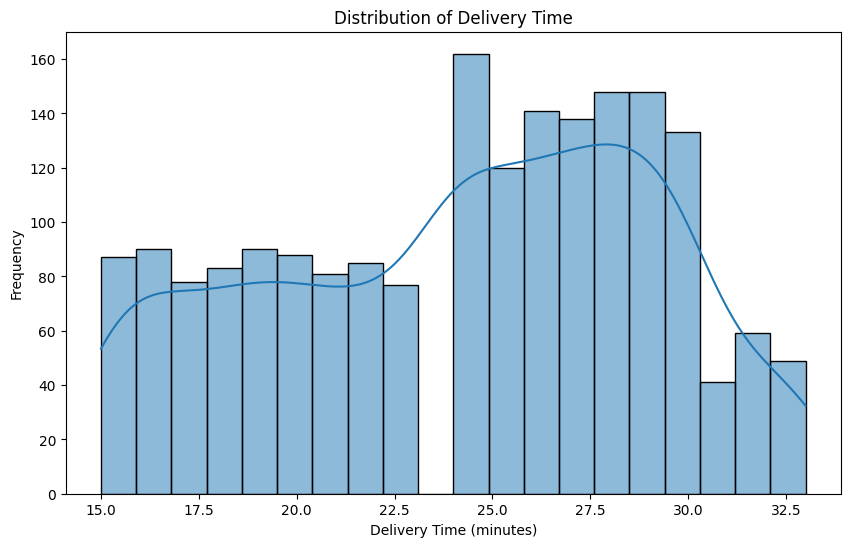

In [96]:
# Explore 'delivery_time'
plt.figure(figsize=(10, 6))
sns.histplot(data['delivery_time'], bins=20, kde=True)

# labels and title
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

Observations:
* Delivery times also appear to be normally distributed with a slight right skew.
* Out of the whole dataset (1898 orders), deliveries that took longer than 30 minutes had a low frequency.
* Orders are most frequently between 22.5 minutes and 30 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [156]:
# Correct
data['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

*   The top 5 resturants by numbers of order recieved were Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm
*   I'd be curious to see the average orders recieved, and the restaurant names with lower than 25% of orders recieved.



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [157]:
data

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17,5.5775
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19,1.8270
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24,6.3050
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.0,23,31,1.8270


In [158]:
# Correct -> is most popular by rating??
weekends = data[data['day_of_the_week']== 'Weekend']
weekends['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:

*   The most popular cuisine on the Weekends by far is American, with Japanese and Italian being the second and third favoraites respectively.
*   Korean, Southern, Spanish, and Vietnamese are all the least popular cuisine types for food delivery on the Weekends.
*   I'd be curious to do more analysis on what percentage the top 4-5 cuisines have compared to all cuisine types.



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [159]:
# Correct
total_orders = len(data)
orders_above_20 = len(data[data['cost_of_the_order'] > 20])
perc_above_20 = round((orders_above_20 / total_orders) * 100,2)
print("Percentage of orders that cost more than 20 dollars: {}".format(perc_above_20))

Percentage of orders that cost more than 20 dollars: 29.24


#### Observations:
Percentage of orders that cost more than 20 dollars: 29.24

### **Question 10**: What is the mean order delivery time? [1 mark]

In [160]:
#Correct
avg_delivery = round(data['delivery_time'].mean(), 2)
avg_delivery

24.16

#### Observations:
The average delivery time is around 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [161]:
# CORRECT!

# 20% discount to top 5 most freq customers -> CORRECT
customer_count = data['customer_id'].value_counts().head()
customer_count

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64

#### Observations:

*   The top 5 most frequent customers are customer_id: 52832, 47440, 83287, 250494, and 259341.
*   I'd be curious to know the lifetime value of each customer that meets our discount voucher threashold.



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   revenue                1898 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 148.4+ KB


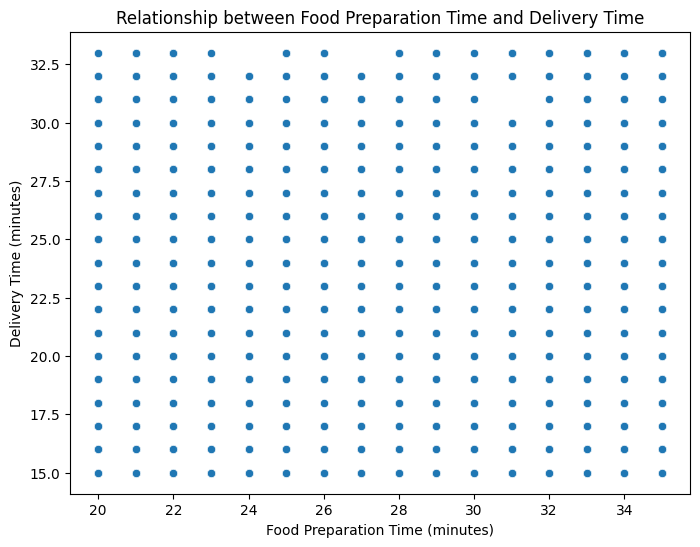

In [163]:
# Correct

# Relationships between numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='food_preparation_time', y='delivery_time', data=data)
plt.title('Relationship between Food Preparation Time and Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

Observation:

*   There is no correlation between food preparation time and delivery time.



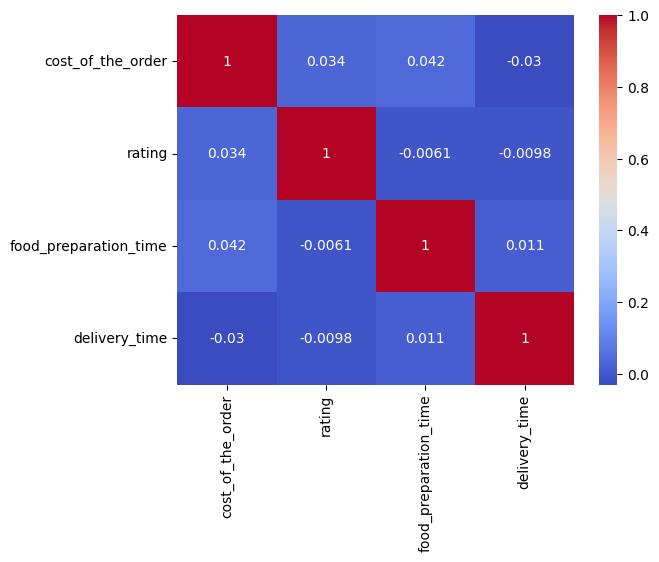

In [111]:
# Correct
# Correlations between numerical variables

# Handle non-numerical values in 'rating' column
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')  # Convert to numeric, replace non-convertible values with NaN

# Calculate correlations between numerical variables
correlation_matrix = data[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']].corr()

# Plot the heatmap
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', cbar=True);

Obersations:
* None of these numerical data have statistically strong correlation (p > 0.5)
* Cost_of_the_order has the the highest correlation with the other data factors of rating, cost_of_the_order, and
delivery_time.

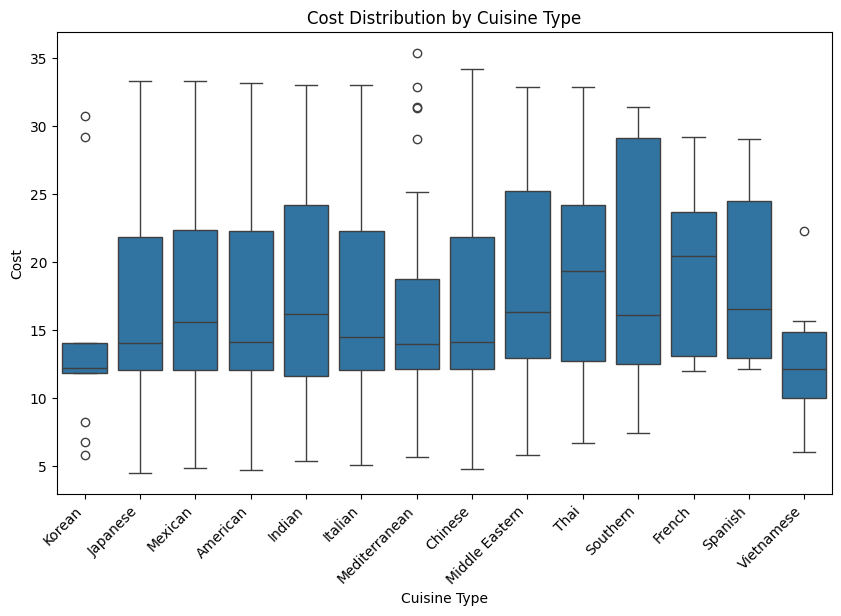

In [112]:
# Correct
# Relationships between numerical and categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=data)
plt.title('Cost Distribution by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost')
plt.xticks(rotation=45, ha='right')
plt.show()

Observation:

*   Certain cuisine types tend to have higher average costs than others. Thai and French for example had a higher frequency of more expensive options than the other cuisines (not including outliers).
*   The price options for Southern, Indian, and Spanish, for example, are far more varied than Korean and Vietnamese.



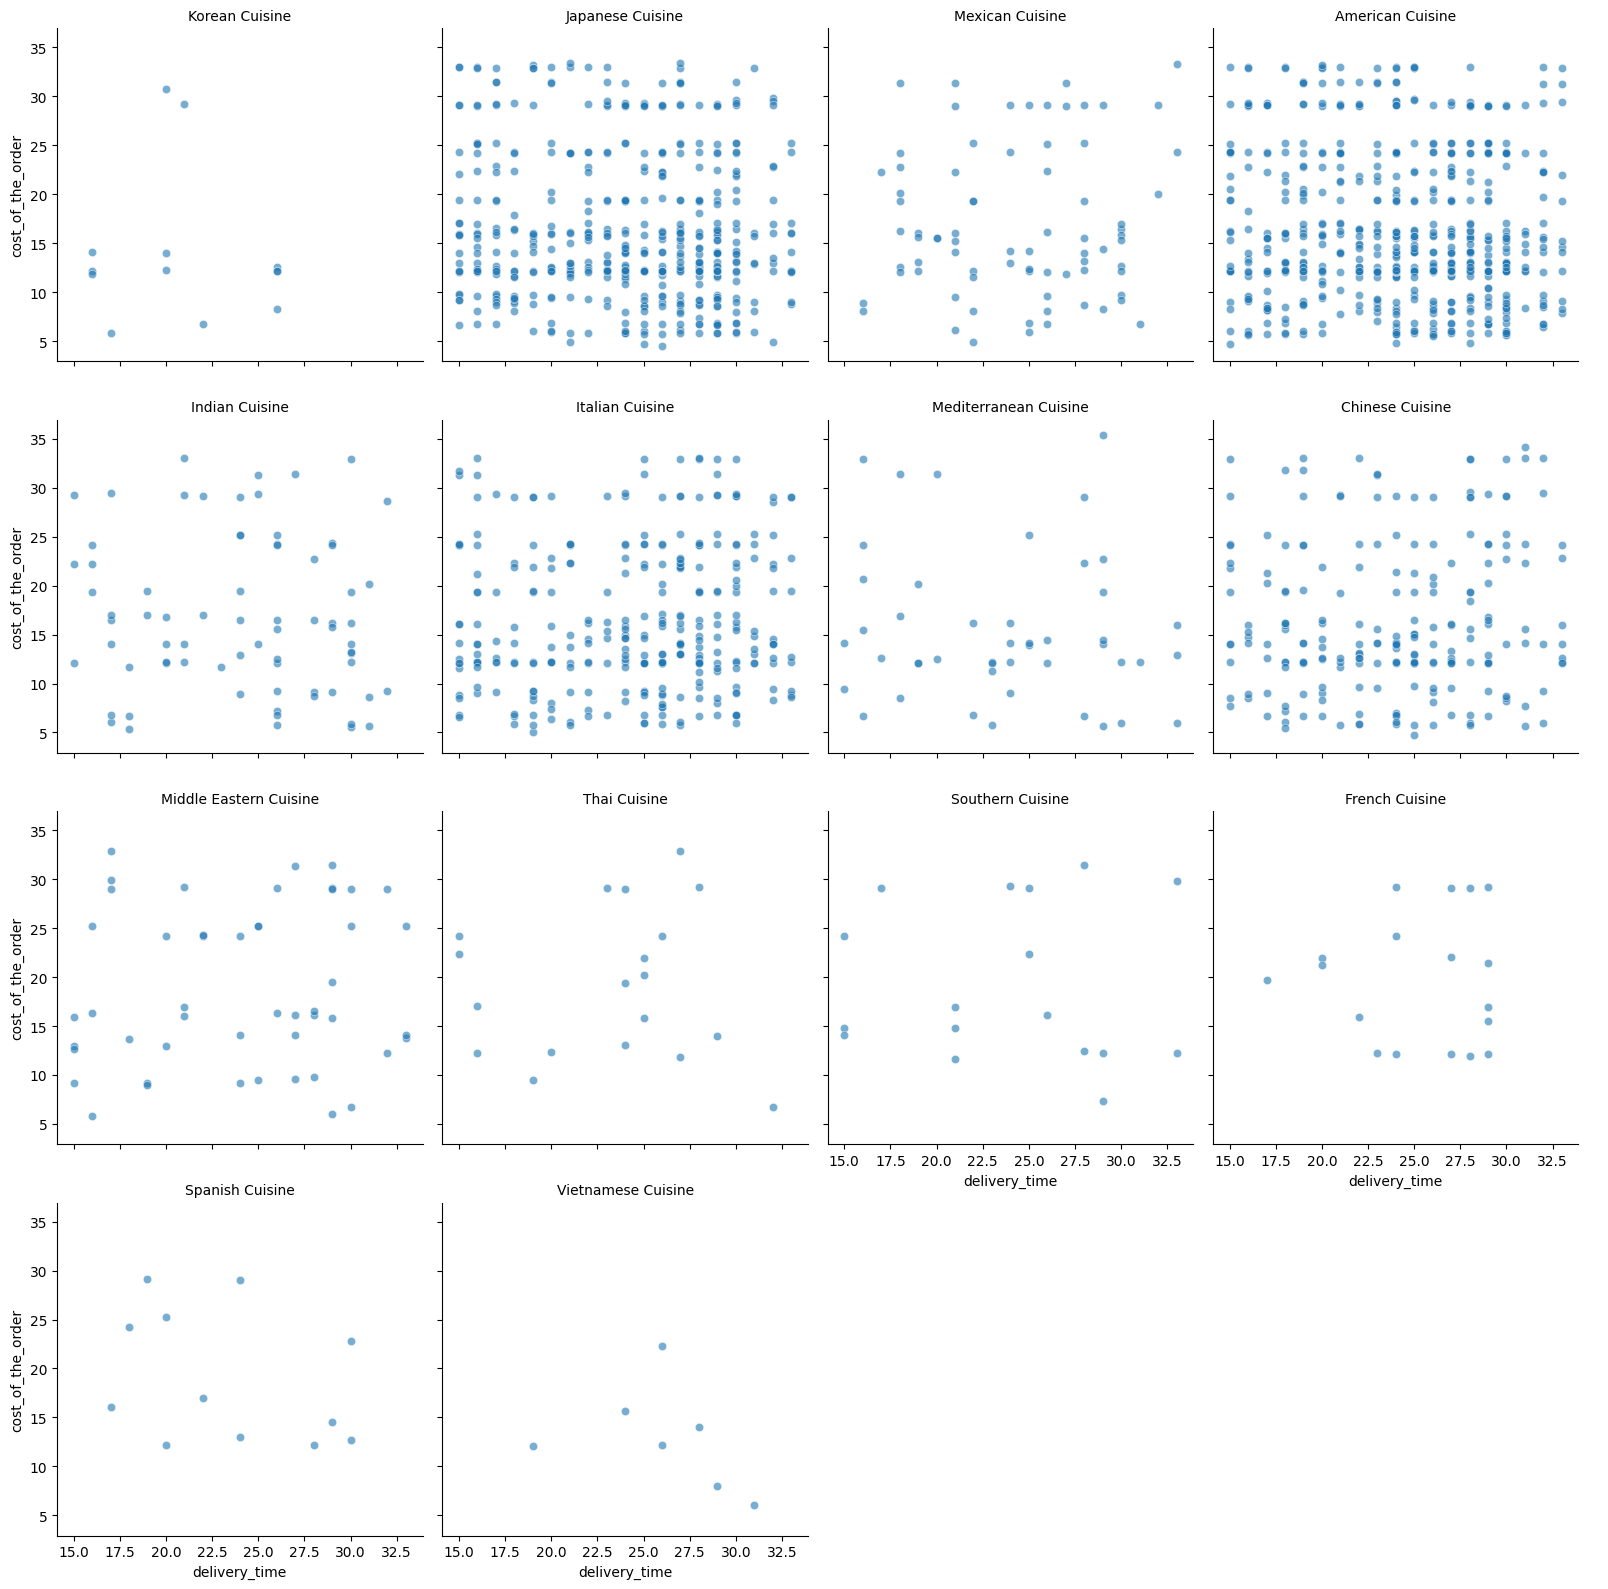

In [143]:
# Correct
#Cg = Cuisine_grid
Cg = sns.FacetGrid(data, col="cuisine_type", col_wrap=4, height=4)
Cg.map(sns.scatterplot, "delivery_time", "cost_of_the_order", alpha=0.6,)
Cg.add_legend()
Cg.set_titles(col_template="{col_name} Cuisine")
plt.show()

Observations:

*   There seems to be no trends between certain cuisine types, delivery times, and the cost of the order.
*   *** Limitations: It's hard to assume if given equal data, that delivery time would be any different between cuisines.



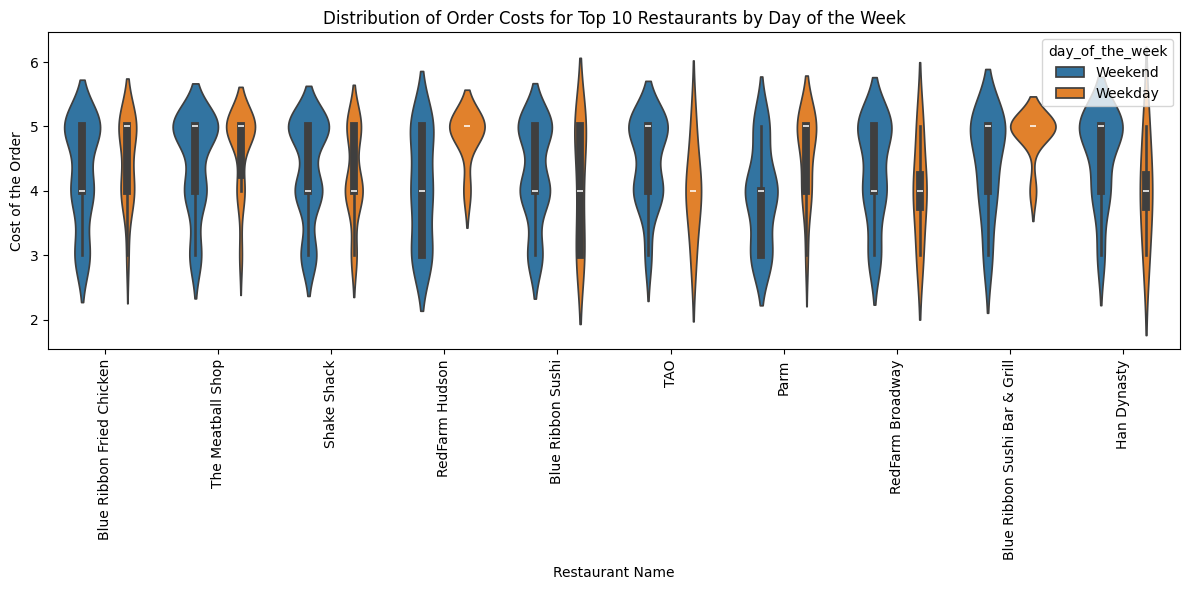

In [144]:
# Calculate the top 10 restaurants
top_10_restaurants = data['restaurant_name'].value_counts().head(10).index

# Filter the data to include only the top 10 restaurants
filtered_data = data[data['restaurant_name'].isin(top_10_restaurants)]

# Create the violin plot with 'day_of_the_week' as the hue
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_data, x='restaurant_name', y='rating', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.title('Distribution of Order Costs for Top 10 Restaurants by Day of the Week')
plt.xlabel('Restaurant Name')
plt.ylabel('Cost of the Order')
plt.tight_layout()
plt.show()

Observations:

*   Even in the top 10 restaurants, there are sigificant differences in reviews between weekends and weekdays.
*   The reviews on weekends are much more frequent for the same popular restaurants, even with ratings lower than 5.0.



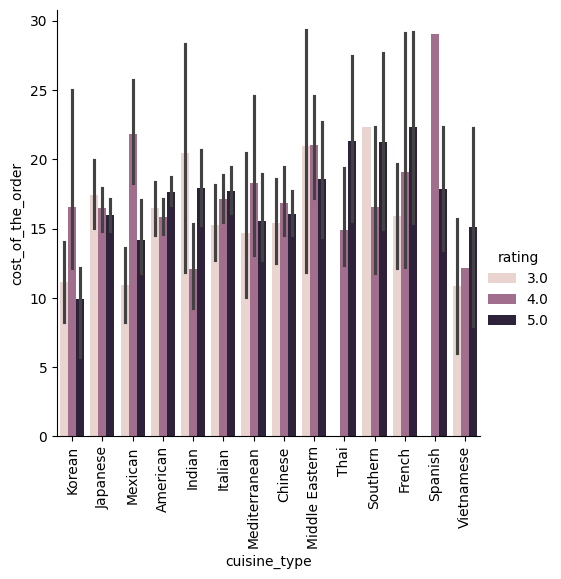

In [152]:
#compare based on rating
sns.catplot(x='cuisine_type', y='cost_of_the_order', data=data, kind="bar", hue='rating')
plt.xticks(rotation=90)
plt.show()

Observations:

*   The confidence intervals on the bars are quite a large range, meaning that there are outliers in the data or less of a central tendancy.
*   This could also indicate we need more rating data.



<ipython-input-164-8455457477ad>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=data, x="delivery_time", y="rating", hue='cuisine_type', estimator='sum', ci=False)


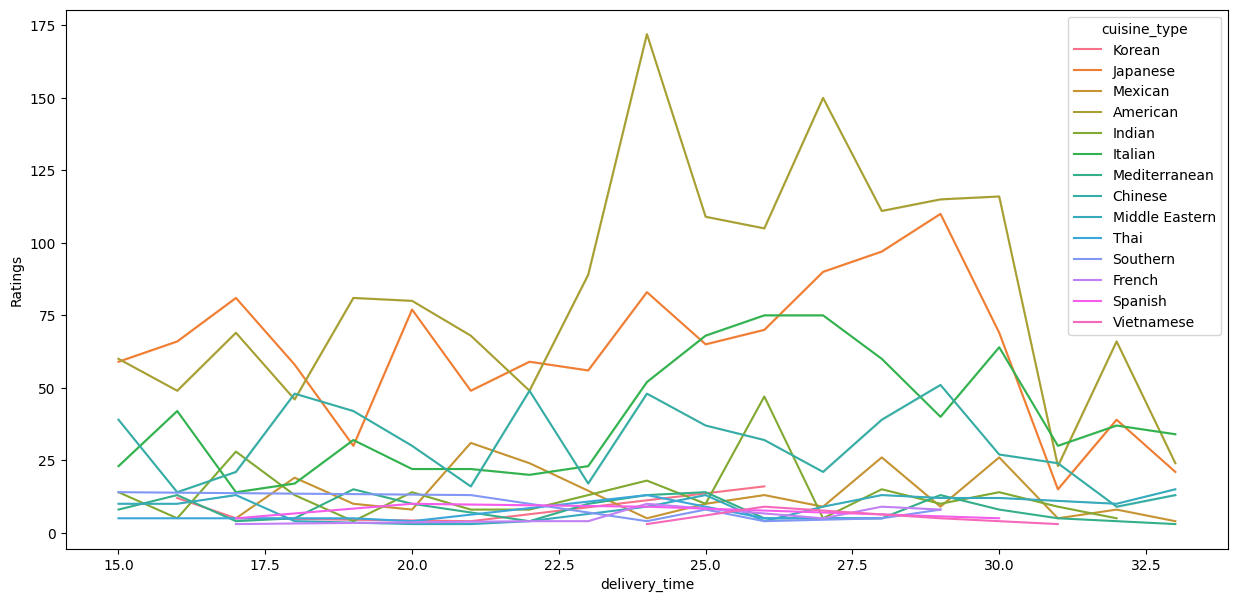

In [164]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data, x="delivery_time", y="rating", hue='cuisine_type', estimator='sum', ci=False)
plt.ylabel('Ratings')
plt.xlabel('delivery_time')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [170]:
#Correct
data_rating = data[data.rating != 'Not given']
data_rating_count = data_rating.restaurant_name.value_counts()
# Restaurant_ratings to filter by mean rating
restauarant_list = list(set(data_rating_count[data_rating_count>50].index) & set(restaurant_ratings[restaurant_ratings['mean'] > 4].index))
print(restauarant_list)

['The Meatball Shop', 'RedFarm Hudson', 'RedFarm Broadway', 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'Parm']


#### Observations:
The restaurants fufilling the criteria for promos are: ['The Meatball Shop', 'RedFarm Hudson', 'RedFarm Broadway', 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'Parm']

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [58]:
# Correct!
# Calculate the revenue for each order based on the given criteria
def company_revenue(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] * 0.25
    elif row['cost_of_the_order'] > 5:
        return row['cost_of_the_order'] * 0.15
    else:
        return 0
# applying the function company_revenue() accross columns to a new column called revenue -> might be wrong
data['revenue'] = data.apply(company_revenue, axis=1)
total_revenue = data['revenue'].sum()

print(f"The net revenue generated by the company: {total_revenue}")

The net revenue generated by the company: 6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [64]:
# Correct!
data['total_time']  = data['food_preparation_time'] + data['delivery_time']
# len is to get the count of time from orders being placed
above_60 = len(data[data['total_time'] >60])
perc_above_60 = round((above_60/total_orders)*100, 2)
perc_above_60

10.54

#### Observations:
About 10.5% of orders take more than 60 minutes to get delivered, from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

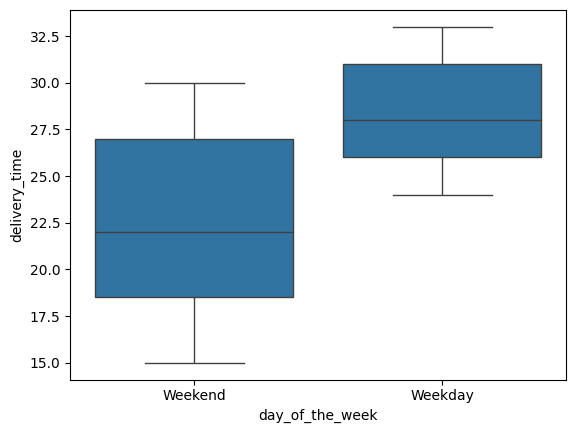

In [18]:
# Correct! -> add title
sns.boxplot(data=data, x="day_of_the_week", y="delivery_time");

#### Observations:


*   The mean delivery time on weekdays is around 28 minutes, differing from the mean delivery time on weekends being around 22 minutes
*   The quickest delivery time on the weekends is around 15 minutes, where as the quickest delivery time on weekdays is around 24 minutes.
*   The overall range on weekdays for delivery time is 24-33 minutes, the overall range on weekends for delivery time is 15-30 minutes
*   Why is delivery time 2-10 minutes faster on weekends compared to weekdays? It might be beneficial to analyze Work related traffic, to see if that could be a leading factor.




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

## Findings:
* Leading Factors: Cuisine_type, Restaurant_name, Day_of_the_week, Cost_of_order
* There are 416 customers who have returned to FoodHub from this dataset to order again. I am uncertain as to how long the gap is before these customrs return.
* Certain cuisine types like American, Japanese, Italian, and Chinese, are more frequently ordered.
*  The top 50% of orders are shared by 11 restaurants.




## Relationships:
*  The mean delivery time on weekdays is around 28 minutes, differing from the mean delivery time on weekends being around 22 minutes
*   The quickest delivery time on weekdays is around 24 minutes, where as the quickest delivery time on the weekends is around 15 minutes.
*  There are 416 customers who have returned to FoodHub from this dataset to order again. I am uncertain as to how long the gap is before these customrs return.
* Even in the top 10 restaurants, there are sigificant differences in reviews between weekends and weekdays.
* The reviews on weekends are much more frequent for the same popular restaurants, even with ratings lower than 5.0.

## No correlation:
* There is no correlation between food preparation time and delivery time.
* There is no correlation between cuisine type, delivery time, and rating.

## Recommendations:

* I would recommend that FoodHub focus on promoting restuarants with the most popular cuisines: American, Japanese, Italian, and Chinese.
* Because we see the most frequent orders between 10-16 USD, promotional offers to reduce orders to that range in online check out could statistically contribute to revenue. This would also extend the lifetime value of our customers by turning them from "luxury customers" to "consistent customers".
* I would focus the promotions on the weekends so that FoodHub can gather more data about the customer experience.
*  We now know the preferred cuisine, the preferred restaurants, the preferred day, and the preferred cost - we now need more data on what impacts delivery time.
* Our goal should be increasing returning customers which can be a proxy for customer satisfaction regardless of rating.



## Limitations/Further Data Collection:

* 736 of the orders made have no rating, but also 1 and 2 values are missing Almost 15% of the ratings are not accounted for. I could assume the 15% of the data is the mean, or I could assume they are low ratings to see the worst case scenario for Food Hub.
* Why is delivery time 2-10 minutes faster on weekends compared to weekdays? It might be beneficial to analyze Work related traffic, to see if that could be a leading factor.

---